In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from torch.utils.data import TensorDataset, DataLoader

In [2]:
def gen_sequence(sequence_len):
    x = np.random.randint(0,10,sequence_len)
    y = np.random.randint(10,size = sequence_len)
    y[0] = x[0]
    for i in range(1,sequence_len):
        y[i] = x[i] + x[0]
        if y[i] > 9:
            y[i] -= 10
    return x,y      

In [3]:
X,y = gen_sequence(10)
print(X)
print(y)

[1 4 6 0 9 9 6 0 8 3]
[1 5 7 1 0 0 7 1 9 4]


In [4]:
class RNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.embedding = torch.nn.Embedding(sequence_len, 16)
        self.rnn = torch.nn.RNN(16, 32, batch_first=True)
        self.out = torch.nn.Linear(32, 10)
        
    def forward(self, sentences, state=None):
        x = self.embedding(sentences)
        x, s = self.rnn(x)
        return self.out(x)

In [5]:
class LSTM(torch.nn.Module):

    def __init__(self):
        super().__init__()
        self.embedding = torch.nn.Embedding(sequence_len, 16)
        self.rnn = torch.nn.LSTM(16, 32, batch_first=True)
        self.out = torch.nn.Linear(32, 10)
        
    def forward(self, sentences, state=None):
        x = self.embedding(sentences)
        x, s = self.rnn(x)
        return self.out(x)

In [6]:
class GRU(torch.nn.Module):

    def __init__(self):
        super().__init__()
        self.embedding = torch.nn.Embedding(sequence_len, 16)
        self.rnn = torch.nn.GRU(16, 32, batch_first=True)
        self.out = torch.nn.Linear(32, 10)
        
    def forward(self, sentences, state=None):
        x = self.embedding(sentences)
        x, s = self.rnn(x)
        return self.out(x)

In [7]:
def train(
    model,criterion, optimizer,
    epoch = 20,
    batch_size = 128
):

    data_train = [gen_sequence(sequence_len) for _ in range(10000)]
    data_test = [gen_sequence(sequence_len) for _ in range(2000)]
    iter_train = DataLoader(data_train, batch_size, shuffle=True)
    iter_test = DataLoader(data_test, batch_size)
    hist_train = np.empty(epoch)
    hist_test = np.empty(epoch)
    for ep in range(epoch):
        start = time.time()
        train_loss = 0.
        train_passed = 0
        test_loss = 0.
        test_passed = 0

        model.train()
        for X_batch,y_batch in iter_train:
            y_batch = y_batch.view(1, -1).squeeze()        
            optimizer.zero_grad()
            y_pred = model(X_batch).view(-1, 10)
            loss = criterion(y_pred, y_batch)  
            train_loss += loss.item()
            train_passed += 1
            loss.backward()
            optimizer.step()    

        model.eval()
        for X_batch, y_batch in iter_test:
            optimizer.zero_grad()
            y_batch = y_batch.view(1, -1).squeeze()
            y_pred = model(X_batch).view(-1, 10)
            loss = criterion(y_pred, y_batch)  
            test_loss += loss.item()
            test_passed += 1

        hist_train[ep] = train_loss/train_passed
        hist_test[ep] = test_loss/test_passed   
        
        print("Epoch {}, Time: {:.3f}, Train loss: {:.3f}, Test loss: {:.3f}".format(ep, time.time() - start, train_loss/train_passed,test_loss/test_passed))
    return hist_train, hist_test

In [8]:
def plot_learning_curves(train, test):
    '''
    Функция для вывода графиков лосса и метрики во время обучения.
    '''
    fig = plt.figure(figsize=(20, 7))

    plt.title('Loss', fontsize=15)
    plt.plot(train, label='train')
    plt.plot(test, label='test')
    plt.ylabel('Loss', fontsize=15)
    plt.xlabel('Epoch', fontsize=15)
    plt.legend()
    plt.show();

In [9]:
sequence_len = 25

Epoch 0, Time: 0.845, Train loss: 2.306, Test loss: 2.300
Epoch 1, Time: 0.814, Train loss: 2.296, Test loss: 2.297
Epoch 2, Time: 0.819, Train loss: 2.291, Test loss: 2.288
Epoch 3, Time: 0.816, Train loss: 2.270, Test loss: 2.246
Epoch 4, Time: 0.858, Train loss: 2.215, Test loss: 2.177
Epoch 5, Time: 0.868, Train loss: 2.149, Test loss: 2.118
Epoch 6, Time: 0.937, Train loss: 2.098, Test loss: 2.119
Epoch 7, Time: 0.821, Train loss: 2.074, Test loss: 2.046
Epoch 8, Time: 0.830, Train loss: 2.036, Test loss: 2.023
Epoch 9, Time: 0.817, Train loss: 2.013, Test loss: 2.008
Epoch 10, Time: 0.818, Train loss: 2.007, Test loss: 2.000
Epoch 11, Time: 0.803, Train loss: 2.000, Test loss: 1.993
Epoch 12, Time: 0.799, Train loss: 1.994, Test loss: 1.986
Epoch 13, Time: 0.885, Train loss: 1.987, Test loss: 1.982
Epoch 14, Time: 1.000, Train loss: 1.981, Test loss: 1.978
Epoch 15, Time: 0.905, Train loss: 1.980, Test loss: 1.974
Epoch 16, Time: 0.887, Train loss: 1.976, Test loss: 1.972
Epoch 1

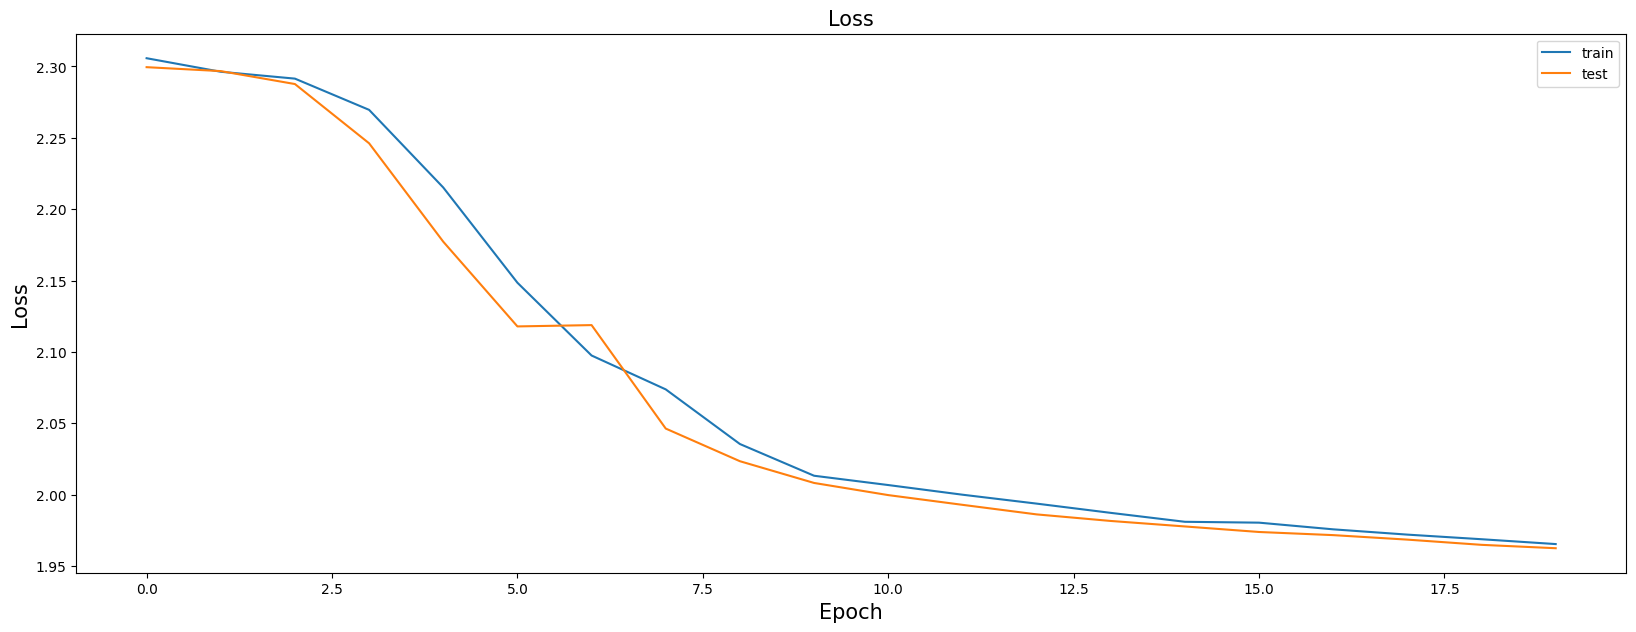

In [10]:
model = RNN()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
rnn25_history = train(model,criterion, optimizer)
plot_learning_curves(rnn25_history[0],rnn25_history[1])

Epoch 0, Time: 1.230, Train loss: 2.302, Test loss: 2.298
Epoch 1, Time: 1.176, Train loss: 2.296, Test loss: 2.293
Epoch 2, Time: 1.270, Train loss: 2.289, Test loss: 2.275
Epoch 3, Time: 1.153, Train loss: 2.142, Test loss: 1.892
Epoch 4, Time: 1.136, Train loss: 1.665, Test loss: 1.530
Epoch 5, Time: 1.154, Train loss: 1.433, Test loss: 1.352
Epoch 6, Time: 1.199, Train loss: 1.299, Test loss: 1.250
Epoch 7, Time: 1.136, Train loss: 1.211, Test loss: 1.174
Epoch 8, Time: 1.083, Train loss: 1.148, Test loss: 1.120
Epoch 9, Time: 1.181, Train loss: 1.101, Test loss: 1.078
Epoch 10, Time: 1.163, Train loss: 1.063, Test loss: 1.045
Epoch 11, Time: 1.085, Train loss: 1.033, Test loss: 1.018
Epoch 12, Time: 1.092, Train loss: 1.009, Test loss: 0.993
Epoch 13, Time: 1.088, Train loss: 0.987, Test loss: 0.972
Epoch 14, Time: 1.075, Train loss: 0.963, Test loss: 0.954
Epoch 15, Time: 1.093, Train loss: 0.949, Test loss: 0.954
Epoch 16, Time: 1.098, Train loss: 0.935, Test loss: 0.920
Epoch 1

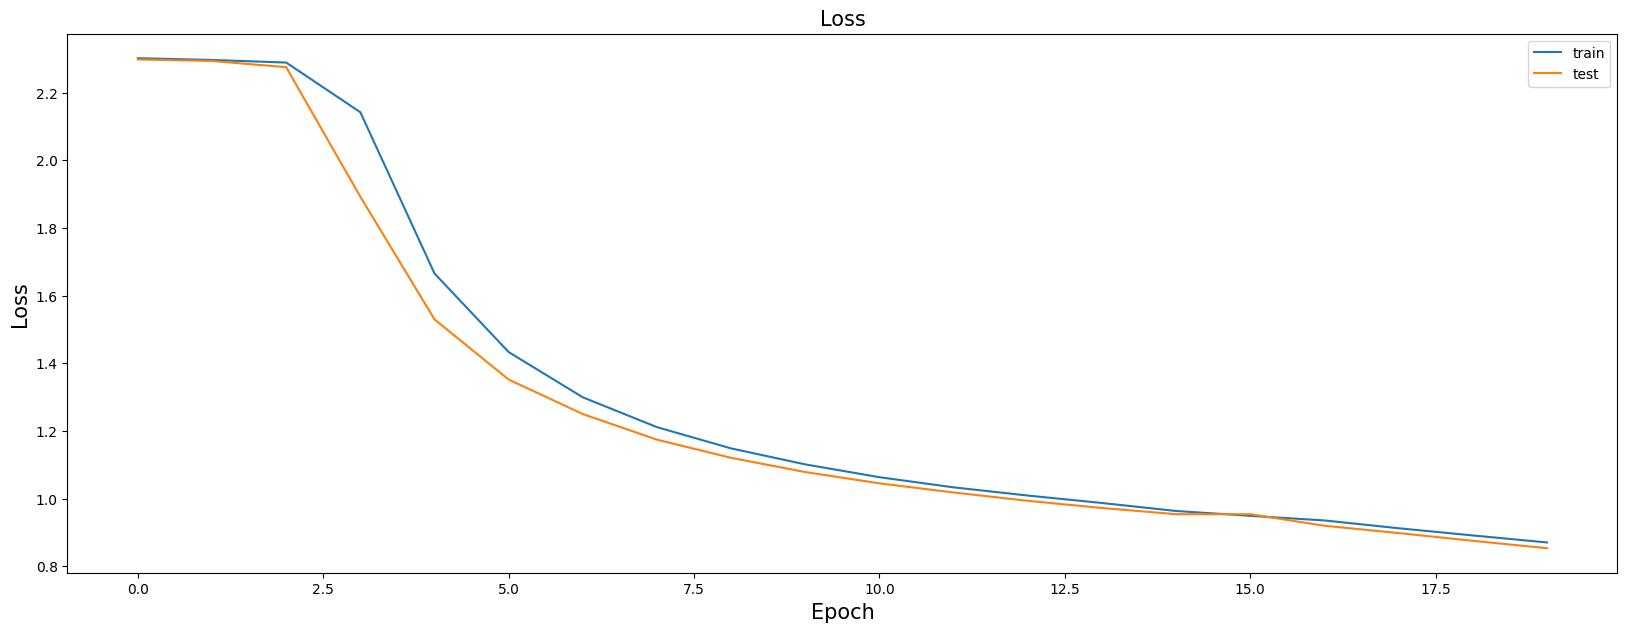

In [11]:
model = LSTM()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
lstm25_history = train(model,criterion, optimizer)
plot_learning_curves(lstm25_history[0],lstm25_history[1])

Epoch 0, Time: 1.693, Train loss: 2.303, Test loss: 2.299
Epoch 1, Time: 1.716, Train loss: 2.296, Test loss: 2.296
Epoch 2, Time: 1.473, Train loss: 2.292, Test loss: 2.289
Epoch 3, Time: 1.507, Train loss: 2.280, Test loss: 2.270
Epoch 4, Time: 1.495, Train loss: 2.216, Test loss: 2.113
Epoch 5, Time: 1.443, Train loss: 1.983, Test loss: 1.875
Epoch 6, Time: 1.439, Train loss: 1.776, Test loss: 1.712
Epoch 7, Time: 1.434, Train loss: 1.634, Test loss: 1.584
Epoch 8, Time: 1.519, Train loss: 1.508, Test loss: 1.447
Epoch 9, Time: 1.592, Train loss: 1.350, Test loss: 1.271
Epoch 10, Time: 1.578, Train loss: 1.160, Test loss: 1.063
Epoch 11, Time: 1.572, Train loss: 0.952, Test loss: 0.868
Epoch 12, Time: 1.589, Train loss: 0.788, Test loss: 0.727
Epoch 13, Time: 1.697, Train loss: 0.657, Test loss: 0.602
Epoch 14, Time: 1.572, Train loss: 0.550, Test loss: 0.512
Epoch 15, Time: 1.544, Train loss: 0.467, Test loss: 0.438
Epoch 16, Time: 1.520, Train loss: 0.403, Test loss: 0.380
Epoch 1

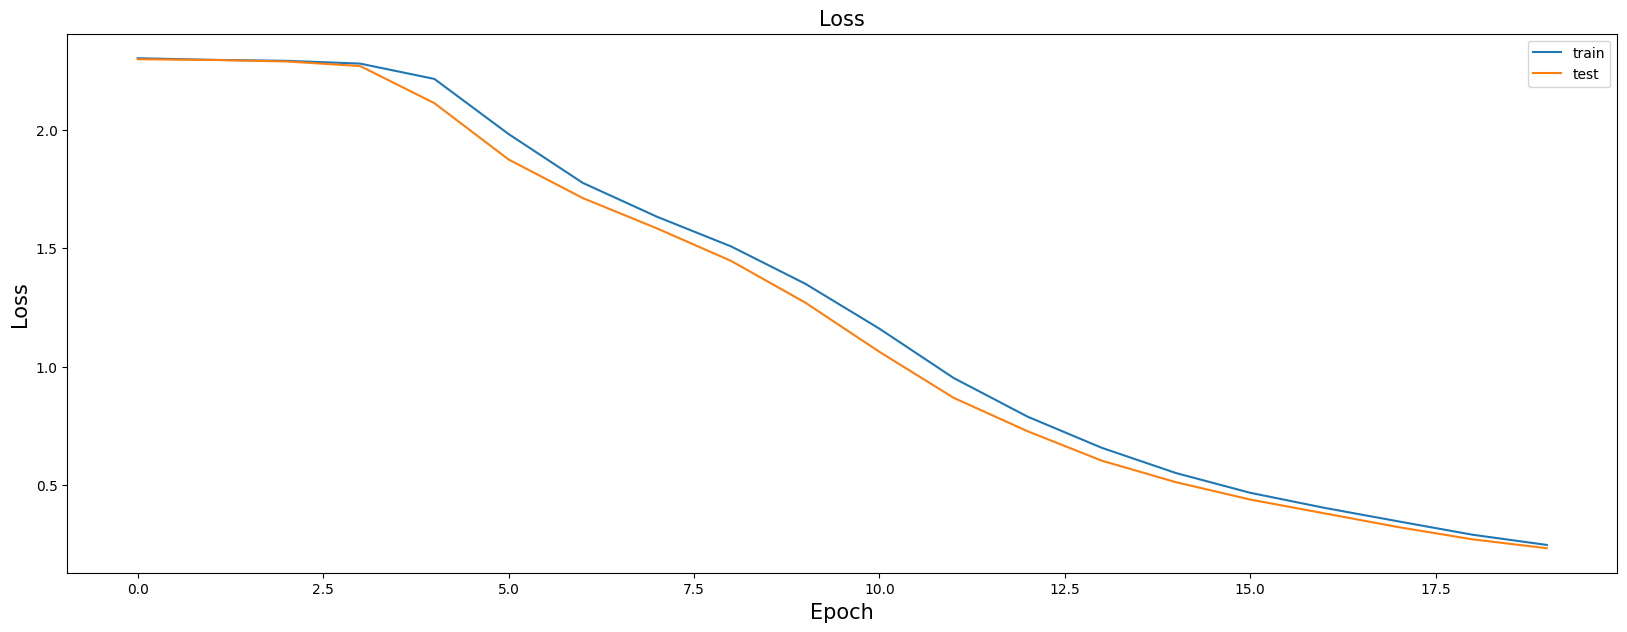

In [12]:
model = GRU()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
gru25_history = train(model,criterion, optimizer)
plot_learning_curves(gru25_history[0],gru25_history[1])

In [13]:
sequence25 = pd.DataFrame({'RNN':rnn25_history[1], 'LSTM':lstm25_history[1], 'GRU':gru25_history[1]})
sequence25

,RNN,LSTM,GRU
0,2.299523,2.297955,2.298855
1,2.296766,2.293339,2.295931
2,2.287703,2.275092,2.289450
3,2.246199,1.892121,2.270116
4,2.177257,1.529620,2.113253
5,2.117901,1.351781,1.875319
6,2.118820,1.249809,1.712353
7,2.046336,1.174107,1.584229
8,2.023463,1.120417,1.446825
9,2.008238,1.078341,1.270635


In [14]:
sequence_len = 75

Epoch 0, Time: 1.943, Train loss: 2.310, Test loss: 2.303
Epoch 1, Time: 1.847, Train loss: 2.303, Test loss: 2.302
Epoch 2, Time: 1.950, Train loss: 2.302, Test loss: 2.302
Epoch 3, Time: 1.858, Train loss: 2.301, Test loss: 2.301
Epoch 4, Time: 1.882, Train loss: 2.300, Test loss: 2.299
Epoch 5, Time: 1.886, Train loss: 2.297, Test loss: 2.295
Epoch 6, Time: 1.771, Train loss: 2.284, Test loss: 2.281
Epoch 7, Time: 1.839, Train loss: 2.245, Test loss: 2.204
Epoch 8, Time: 1.839, Train loss: 2.169, Test loss: 2.141
Epoch 9, Time: 1.721, Train loss: 2.112, Test loss: 2.078
Epoch 10, Time: 1.783, Train loss: 2.074, Test loss: 2.054
Epoch 11, Time: 1.834, Train loss: 2.049, Test loss: 2.032
Epoch 12, Time: 1.791, Train loss: 2.035, Test loss: 2.022
Epoch 13, Time: 1.967, Train loss: 2.022, Test loss: 2.012
Epoch 14, Time: 1.847, Train loss: 2.015, Test loss: 2.006
Epoch 15, Time: 1.855, Train loss: 2.006, Test loss: 2.000
Epoch 16, Time: 1.878, Train loss: 2.000, Test loss: 1.995
Epoch 1

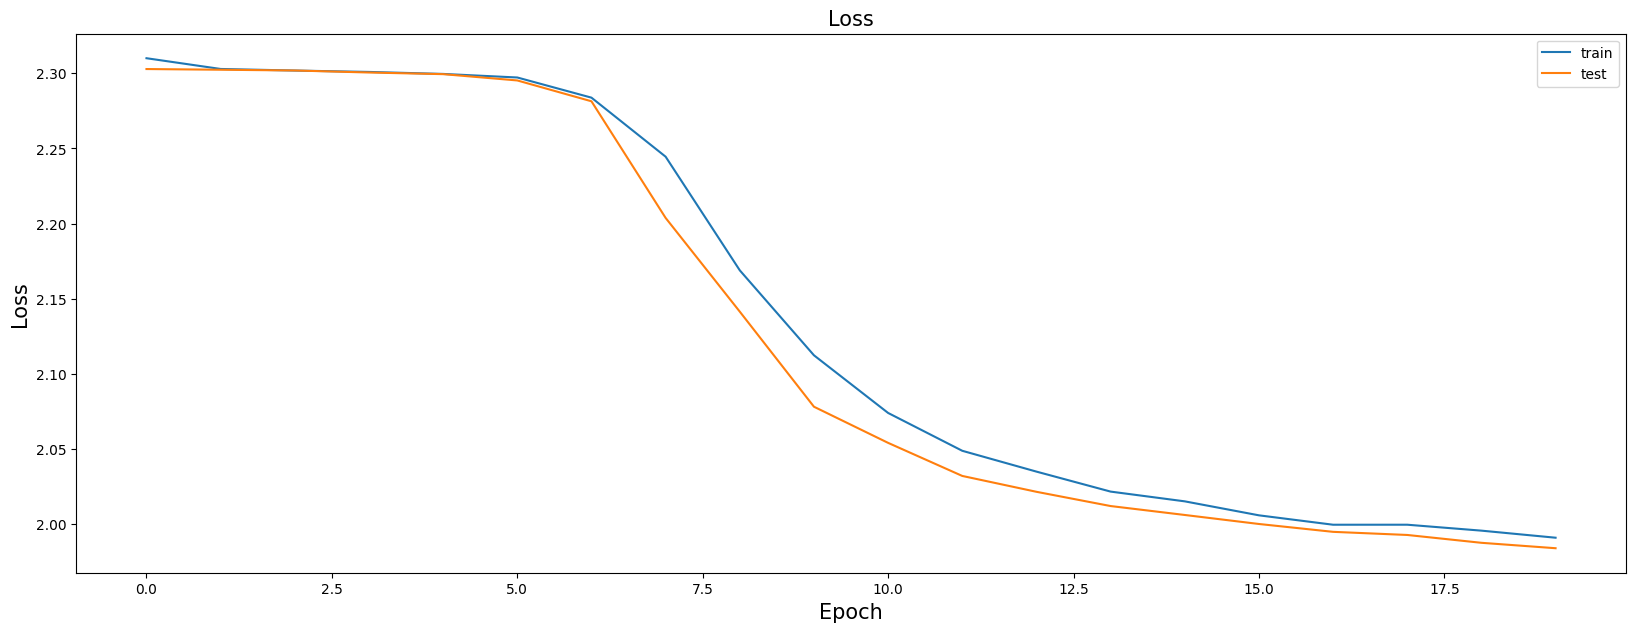

In [15]:
model = RNN()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
rnn75_history = train(model,criterion, optimizer)
plot_learning_curves(rnn75_history[0],rnn75_history[1])

Epoch 0, Time: 2.869, Train loss: 2.304, Test loss: 2.303
Epoch 1, Time: 3.254, Train loss: 2.302, Test loss: 2.303
Epoch 2, Time: 3.295, Train loss: 2.302, Test loss: 2.303
Epoch 3, Time: 3.289, Train loss: 2.301, Test loss: 2.302
Epoch 4, Time: 3.178, Train loss: 2.301, Test loss: 2.302
Epoch 5, Time: 3.144, Train loss: 2.300, Test loss: 2.300
Epoch 6, Time: 3.238, Train loss: 2.223, Test loss: 2.120
Epoch 7, Time: 3.411, Train loss: 2.009, Test loss: 1.907
Epoch 8, Time: 3.175, Train loss: 1.813, Test loss: 1.742
Epoch 9, Time: 3.234, Train loss: 1.709, Test loss: 1.684
Epoch 10, Time: 3.148, Train loss: 1.674, Test loss: 1.674
Epoch 11, Time: 3.195, Train loss: 1.726, Test loss: 1.666
Epoch 12, Time: 3.261, Train loss: 1.653, Test loss: 1.642
Epoch 13, Time: 3.181, Train loss: 1.635, Test loss: 1.621
Epoch 14, Time: 3.217, Train loss: 1.617, Test loss: 1.604
Epoch 15, Time: 3.366, Train loss: 1.598, Test loss: 1.581
Epoch 16, Time: 3.200, Train loss: 1.574, Test loss: 1.554
Epoch 1

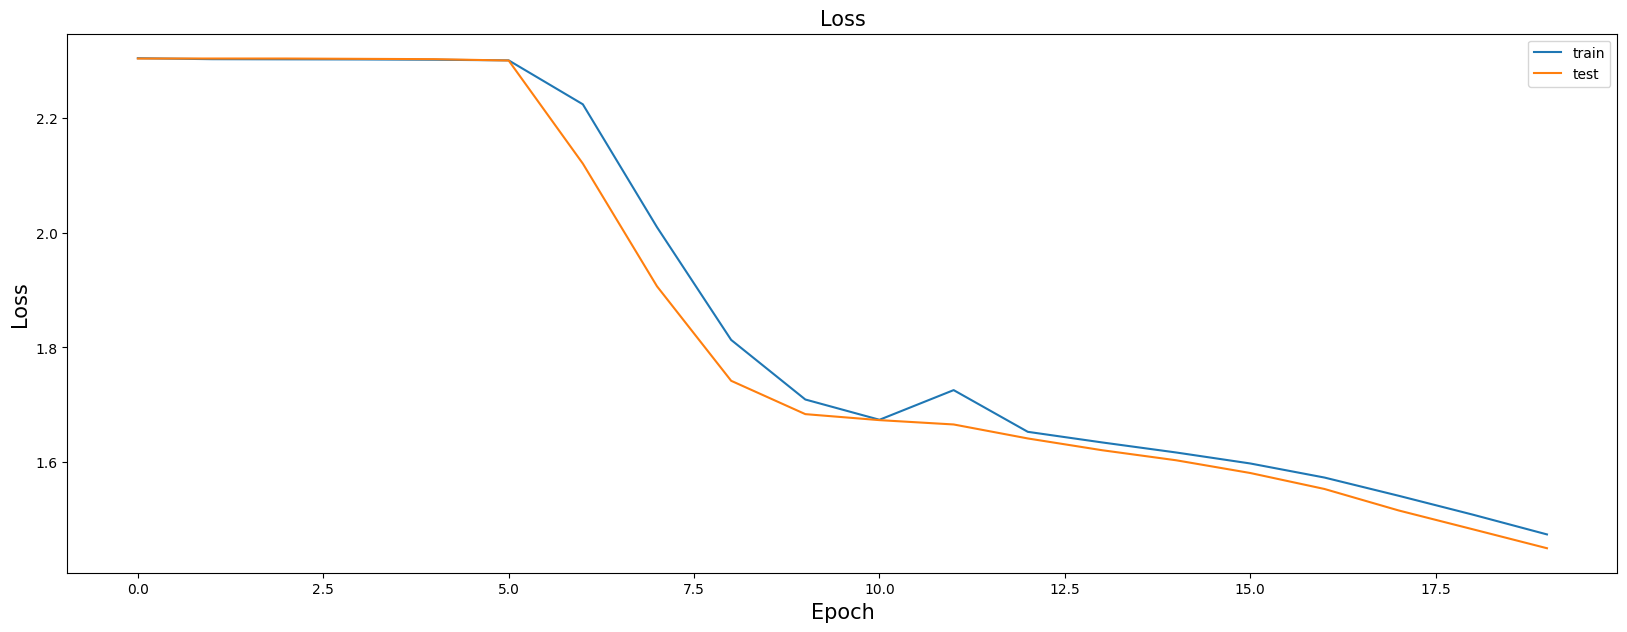

In [16]:
model = LSTM()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
lstm75_history = train(model,criterion, optimizer)
plot_learning_curves(lstm75_history[0],lstm75_history[1])

Epoch 0, Time: 4.318, Train loss: 2.304, Test loss: 2.302
Epoch 1, Time: 4.084, Train loss: 2.302, Test loss: 2.301
Epoch 2, Time: 4.194, Train loss: 2.302, Test loss: 2.300
Epoch 3, Time: 4.221, Train loss: 2.301, Test loss: 2.300
Epoch 4, Time: 3.857, Train loss: 2.301, Test loss: 2.299
Epoch 5, Time: 4.270, Train loss: 2.300, Test loss: 2.298
Epoch 6, Time: 4.069, Train loss: 2.298, Test loss: 2.296
Epoch 7, Time: 3.948, Train loss: 2.295, Test loss: 2.290
Epoch 8, Time: 3.904, Train loss: 2.160, Test loss: 1.907
Epoch 9, Time: 4.235, Train loss: 1.699, Test loss: 1.485
Epoch 10, Time: 4.211, Train loss: 1.302, Test loss: 1.134
Epoch 11, Time: 4.052, Train loss: 0.953, Test loss: 0.856
Epoch 12, Time: 3.933, Train loss: 0.811, Test loss: 0.781
Epoch 13, Time: 4.395, Train loss: 0.763, Test loss: 0.750
Epoch 14, Time: 4.059, Train loss: 0.740, Test loss: 0.732
Epoch 15, Time: 4.037, Train loss: 0.721, Test loss: 0.711
Epoch 16, Time: 4.042, Train loss: 0.695, Test loss: 0.677
Epoch 1

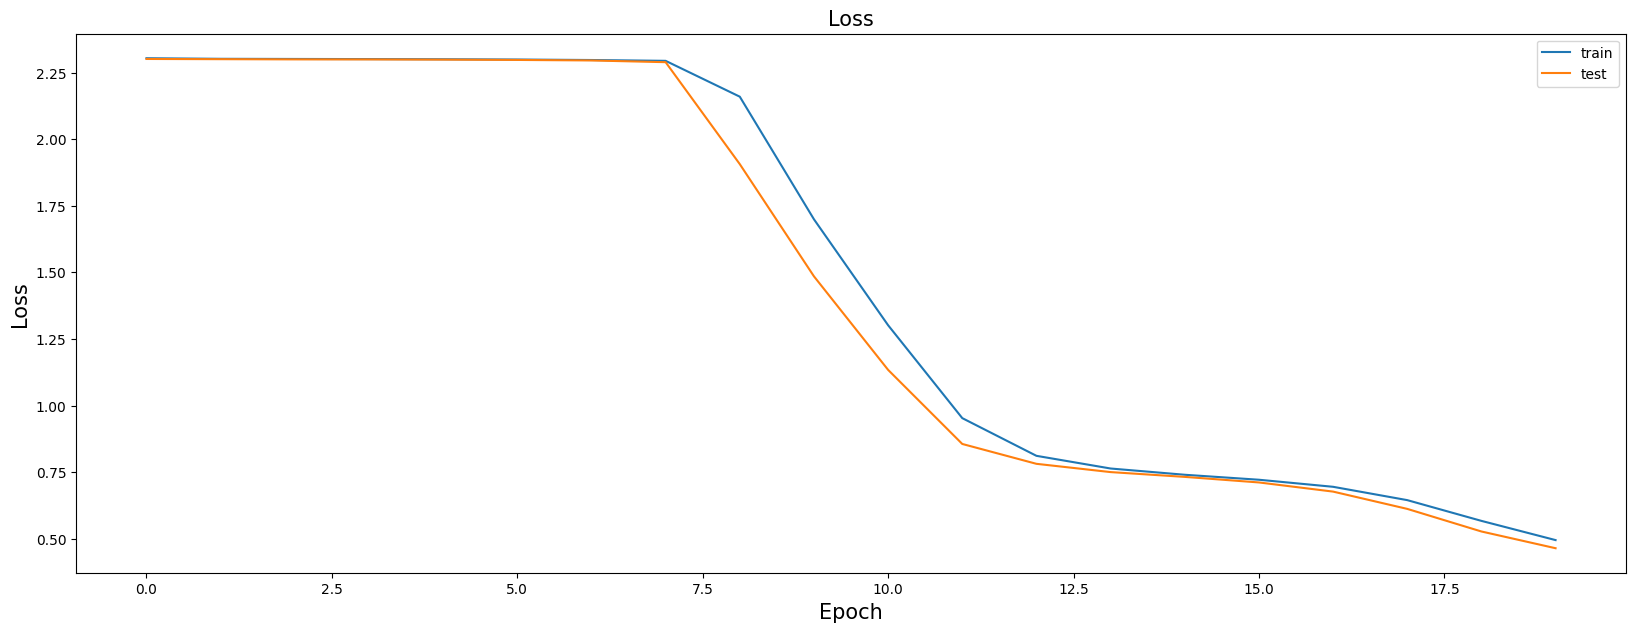

In [17]:
model = GRU()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
gru75_history = train(model,criterion, optimizer)
plot_learning_curves(gru75_history[0],gru75_history[1])

In [18]:
sequence75 = pd.DataFrame({'RNN':rnn75_history[1], 'LSTM':lstm75_history[1], 'GRU':gru75_history[1]})
sequence75

,RNN,LSTM,GRU
0,2.302863,2.303030,2.301583
1,2.302401,2.303067,2.300814
2,2.301901,2.303048,2.300026
3,2.300554,2.302500,2.299890
4,2.299463,2.301939,2.299162
5,2.295270,2.299585,2.297964
6,2.281406,2.120144,2.295981
7,2.203782,1.906507,2.289538
8,2.141404,1.742022,1.906628
9,2.078135,1.683967,1.485211


In [19]:
sequence_len = 150

Epoch 0, Time: 3.328, Train loss: 2.307, Test loss: 2.302
Epoch 1, Time: 3.227, Train loss: 2.303, Test loss: 2.302
Epoch 2, Time: 3.324, Train loss: 2.303, Test loss: 2.302
Epoch 3, Time: 3.220, Train loss: 2.303, Test loss: 2.302
Epoch 4, Time: 3.241, Train loss: 2.302, Test loss: 2.301
Epoch 5, Time: 3.233, Train loss: 2.302, Test loss: 2.302
Epoch 6, Time: 3.248, Train loss: 2.302, Test loss: 2.301
Epoch 7, Time: 3.130, Train loss: 2.302, Test loss: 2.301
Epoch 8, Time: 3.284, Train loss: 2.301, Test loss: 2.300
Epoch 9, Time: 3.251, Train loss: 2.301, Test loss: 2.300
Epoch 10, Time: 3.505, Train loss: 2.300, Test loss: 2.299
Epoch 11, Time: 3.252, Train loss: 2.299, Test loss: 2.298
Epoch 12, Time: 3.231, Train loss: 2.296, Test loss: 2.290
Epoch 13, Time: 3.340, Train loss: 2.278, Test loss: 2.265
Epoch 14, Time: 3.299, Train loss: 2.246, Test loss: 2.225
Epoch 15, Time: 3.284, Train loss: 2.191, Test loss: 2.160
Epoch 16, Time: 3.255, Train loss: 2.122, Test loss: 2.213
Epoch 1

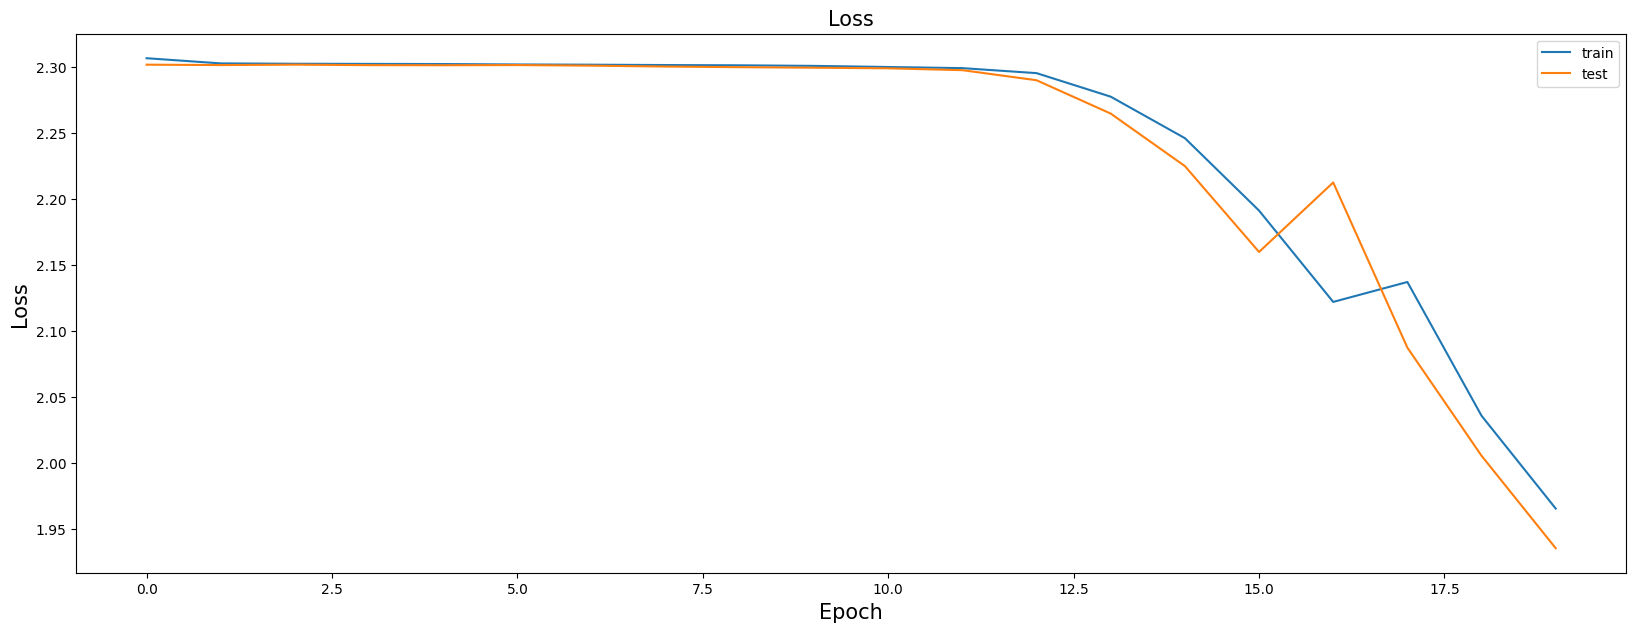

In [20]:
model = RNN()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
rnn150_history = train(model,criterion, optimizer)
plot_learning_curves(rnn150_history[0],rnn150_history[1])

Epoch 0, Time: 5.984, Train loss: 2.304, Test loss: 2.303
Epoch 1, Time: 5.875, Train loss: 2.303, Test loss: 2.303
Epoch 2, Time: 4.770, Train loss: 2.302, Test loss: 2.303
Epoch 3, Time: 5.812, Train loss: 2.302, Test loss: 2.303
Epoch 4, Time: 6.113, Train loss: 2.302, Test loss: 2.303
Epoch 5, Time: 5.952, Train loss: 2.302, Test loss: 2.303
Epoch 6, Time: 4.790, Train loss: 2.302, Test loss: 2.303
Epoch 7, Time: 4.787, Train loss: 2.302, Test loss: 2.303
Epoch 8, Time: 4.808, Train loss: 2.302, Test loss: 2.303
Epoch 9, Time: 4.876, Train loss: 2.301, Test loss: 2.303
Epoch 10, Time: 6.066, Train loss: 2.301, Test loss: 2.302
Epoch 11, Time: 6.137, Train loss: 2.295, Test loss: 2.264
Epoch 12, Time: 4.863, Train loss: 2.185, Test loss: 2.091
Epoch 13, Time: 5.841, Train loss: 2.028, Test loss: 1.933
Epoch 14, Time: 5.891, Train loss: 1.892, Test loss: 1.849
Epoch 15, Time: 4.778, Train loss: 1.803, Test loss: 1.690
Epoch 16, Time: 5.050, Train loss: 1.521, Test loss: 1.340
Epoch 1

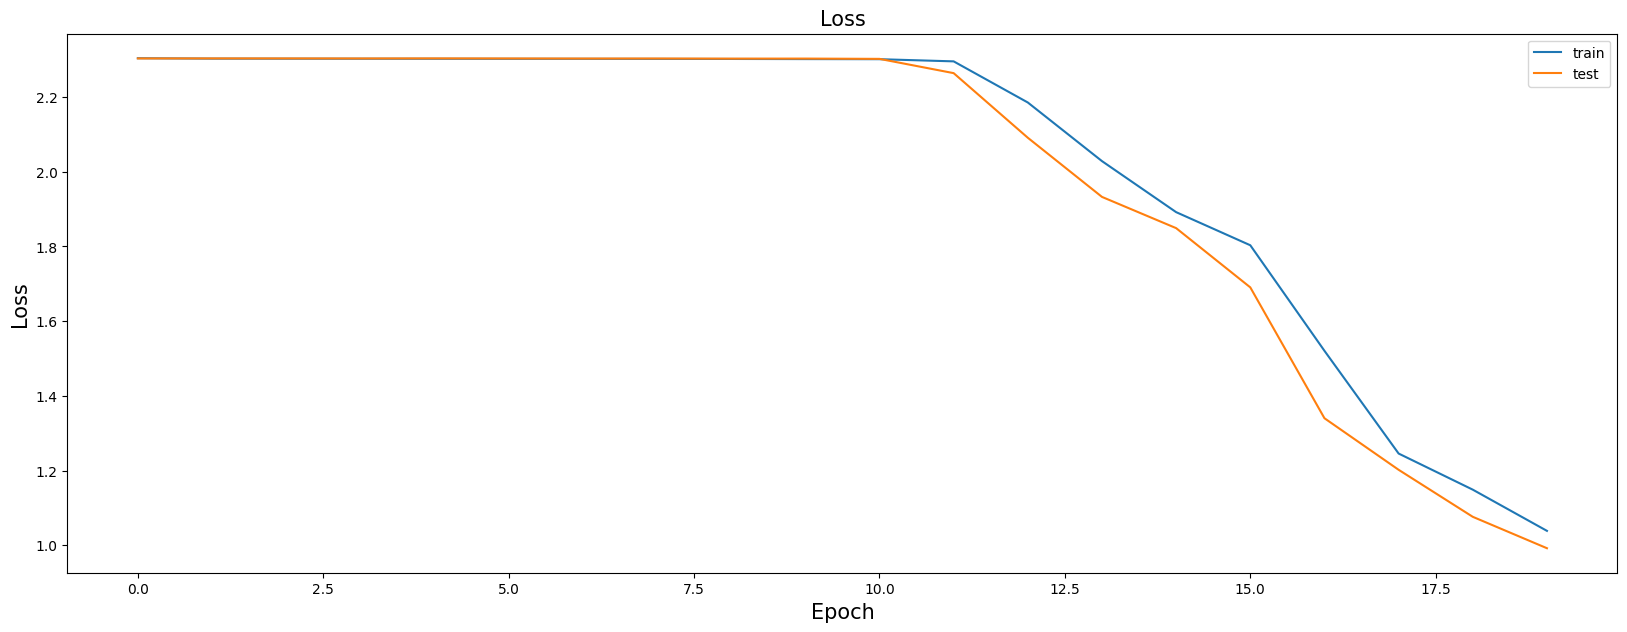

In [21]:
model = LSTM()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
lstm150_history = train(model,criterion, optimizer)
plot_learning_curves(lstm150_history[0],lstm150_history[1])

Epoch 0, Time: 7.532, Train loss: 2.306, Test loss: 2.303
Epoch 1, Time: 7.653, Train loss: 2.303, Test loss: 2.303
Epoch 2, Time: 7.903, Train loss: 2.302, Test loss: 2.303
Epoch 3, Time: 7.657, Train loss: 2.302, Test loss: 2.303
Epoch 4, Time: 7.791, Train loss: 2.302, Test loss: 2.303
Epoch 5, Time: 8.133, Train loss: 2.302, Test loss: 2.303
Epoch 6, Time: 7.676, Train loss: 2.302, Test loss: 2.302
Epoch 7, Time: 7.401, Train loss: 2.302, Test loss: 2.302
Epoch 8, Time: 7.589, Train loss: 2.302, Test loss: 2.302
Epoch 9, Time: 7.921, Train loss: 2.302, Test loss: 2.302
Epoch 10, Time: 7.917, Train loss: 2.301, Test loss: 2.301
Epoch 11, Time: 7.895, Train loss: 2.301, Test loss: 2.301
Epoch 12, Time: 7.710, Train loss: 2.300, Test loss: 2.300
Epoch 13, Time: 8.210, Train loss: 2.300, Test loss: 2.300
Epoch 14, Time: 7.544, Train loss: 2.285, Test loss: 2.214
Epoch 15, Time: 7.624, Train loss: 2.089, Test loss: 1.984
Epoch 16, Time: 7.806, Train loss: 1.918, Test loss: 1.856
Epoch 1

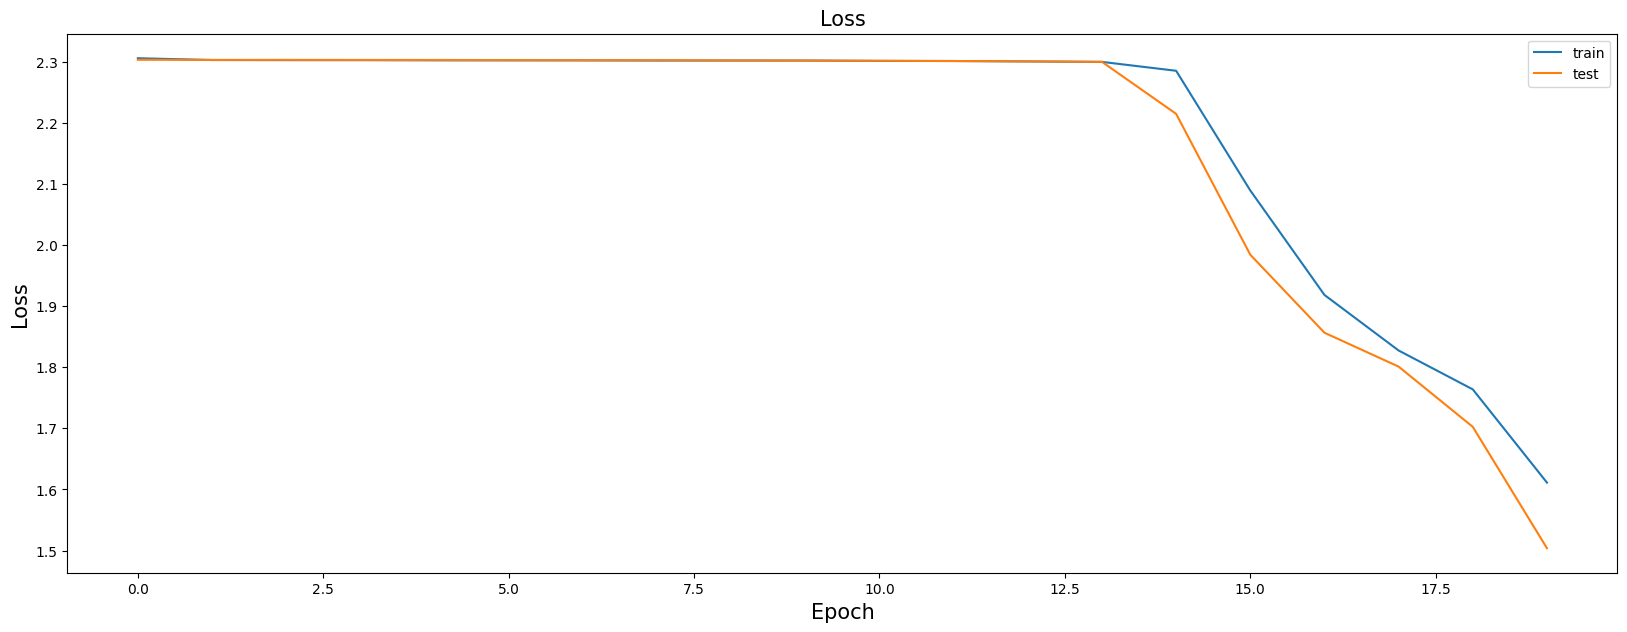

In [22]:
model = GRU()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
gru150_history = train(model,criterion, optimizer)
plot_learning_curves(gru150_history[0],gru150_history[1])

In [23]:
sequence150 = pd.DataFrame({'RNN':rnn150_history[1], 'LSTM':lstm150_history[1], 'GRU':gru150_history[1]})
sequence150

,RNN,LSTM,GRU
0,2.301940,2.303119,2.303032
1,2.301642,2.303183,2.302752
2,2.301957,2.303139,2.302811
3,2.301577,2.303025,2.302695
4,2.301498,2.303245,2.302660
5,2.301638,2.303041,2.302504
6,2.301189,2.302814,2.302196
7,2.300518,2.302927,2.302413
8,2.300030,2.302584,2.301985
9,2.299640,2.302737,2.301760
